In [1]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [69]:
matrix_height = 500 + 1
matrix_width = 500 + 1
px_size = 5 * 10 ** -3  # mm
nu_min = 0
nu_max = 100  # mm
nu_descr = 1 / px_size

In [70]:
nu_h_1d_grid = np.arange(nu_min, nu_max + 1, nu_max/5) / nu_descr
nu_h_1d_grid

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5])

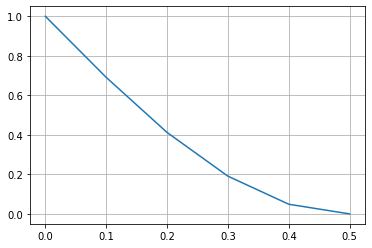

array([1.        , 0.69098301, 0.41221475, 0.19098301, 0.04894348,
       0.        ])

In [71]:
H = 1 - np.sin(np.pi * nu_h_1d_grid)
plt.plot(nu_h_1d_grid, H)
plt.grid(True)
plt.show()
H

In [72]:
filter_matrix = np.array([[2 * np.cos(i * 2 * np.pi * nu_0) for i in range(1, 5 + 1, 1)] for nu_0 in nu_h_1d_grid])
filter_matrix = np.c_[np.ones(6), filter_matrix]
filter_matrix

array([[ 1.        ,  2.        ,  2.        ,  2.        ,  2.        ,
         2.        ],
       [ 1.        ,  1.61803399,  0.61803399, -0.61803399, -1.61803399,
        -2.        ],
       [ 1.        ,  0.61803399, -1.61803399, -1.61803399,  0.61803399,
         2.        ],
       [ 1.        , -0.61803399, -1.61803399,  1.61803399,  0.61803399,
        -2.        ],
       [ 1.        , -1.61803399,  0.61803399,  0.61803399, -1.61803399,
         2.        ],
       [ 1.        , -2.        ,  2.        , -2.        ,  2.        ,
        -2.        ]])

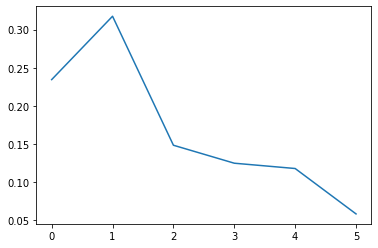

array([0.23431242, 0.31755705, 0.14813053, 0.12452373, 0.11755705,
       0.05791922])

In [73]:
h = np.matmul(H, np.linalg.inv(filter_matrix))
plt.plot(h)
plt.show()
h

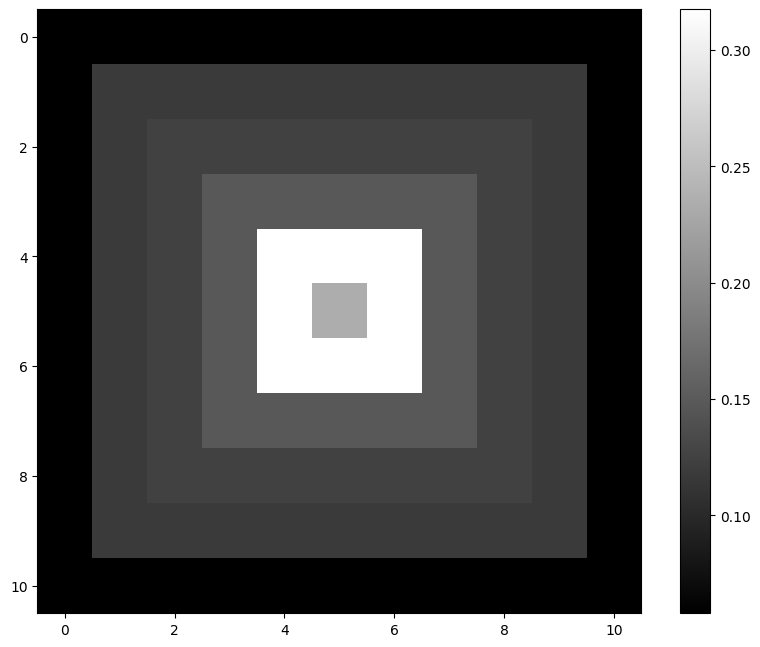

array([[0.05791922, 0.05791922, 0.05791922, 0.05791922, 0.05791922,
        0.05791922, 0.05791922, 0.05791922, 0.05791922, 0.05791922,
        0.05791922],
       [0.05791922, 0.11755705, 0.11755705, 0.11755705, 0.11755705,
        0.11755705, 0.11755705, 0.11755705, 0.11755705, 0.11755705,
        0.05791922],
       [0.05791922, 0.11755705, 0.12452373, 0.12452373, 0.12452373,
        0.12452373, 0.12452373, 0.12452373, 0.12452373, 0.11755705,
        0.05791922],
       [0.05791922, 0.11755705, 0.12452373, 0.14813053, 0.14813053,
        0.14813053, 0.14813053, 0.14813053, 0.12452373, 0.11755705,
        0.05791922],
       [0.05791922, 0.11755705, 0.12452373, 0.14813053, 0.31755705,
        0.31755705, 0.31755705, 0.14813053, 0.12452373, 0.11755705,
        0.05791922],
       [0.05791922, 0.11755705, 0.12452373, 0.14813053, 0.31755705,
        0.23431242, 0.31755705, 0.14813053, 0.12452373, 0.11755705,
        0.05791922],
       [0.05791922, 0.11755705, 0.12452373, 0.14813053, 0.

In [74]:
h_1d = np.concatenate((h, h[4::-1]))

h0, h1, h2, h3, h4, h5 = h
h_2d = np.array([
    [h5, h5, h5, h5, h5, h5, h5, h5, h5, h5, h5],
    [h5, h4, h4, h4, h4, h4, h4, h4, h4, h4, h5],
    [h5, h4, h3, h3, h3, h3, h3, h3, h3, h4, h5],
    [h5, h4, h3, h2, h2, h2, h2, h2, h3, h4, h5],
    [h5, h4, h3, h2, h1, h1, h1, h2, h3, h4, h5],
    [h5, h4, h3, h2, h1, h0, h1, h2, h3, h4, h5],
    [h5, h4, h3, h2, h1, h1, h1, h2, h3, h4, h5],
    [h5, h4, h3, h2, h2, h2, h2, h2, h3, h4, h5],
    [h5, h4, h3, h3, h3, h3, h3, h3, h3, h4, h5],
    [h5, h4, h4, h4, h4, h4, h4, h4, h4, h4, h5],
    [h5, h5, h5, h5, h5, h5, h5, h5, h5, h5, h5]
])
figure(figsize=(10, 8), dpi=100)
plt.imshow(h_2d, cmap='gray')
plt.colorbar()
plt.show()
h_2d

In [75]:
def triangle(z:np.ndarray, a:int=0, b:int=2, c:int=4):
    z[z == a] = 0
    z[z == c] = 0
    first_half = np.logical_and(a < z, z <= b)
    z[first_half] = (z[first_half]-a) / (b-a)
    second_half = np.logical_and(b < z, z < c)
    z[second_half] = (c-z[second_half]) / (c-b)

triangle_slice = np.arange(0, matrix_width, dtype=np.float64)
triangle(triangle_slice, 69, 115, 161)
triangle(triangle_slice, 207, 253, 299)
triangle(triangle_slice, 345, 391, 437)
triangle_slice[0:69] = 0
triangle_slice[161:207] = 0
triangle_slice[299:345] = 0
triangle_slice[437:matrix_width] = 0
normalized_triangle_image = ((triangle_slice - triangle_slice.min()) * (1 / (triangle_slice.max() - triangle_slice.min()) * 255)).astype('uint8')
normalized_triangle_image = np.tile(normalized_triangle_image, (matrix_height, 1))

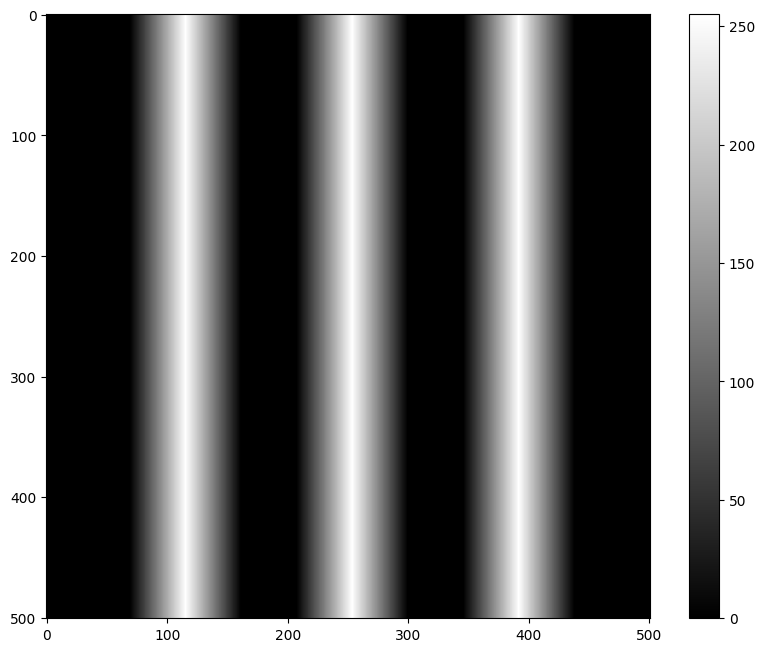

In [76]:
figure(figsize=(10, 8), dpi=100)
plt.imshow(normalized_triangle_image, cmap='gray')
plt.colorbar()
plt.show()

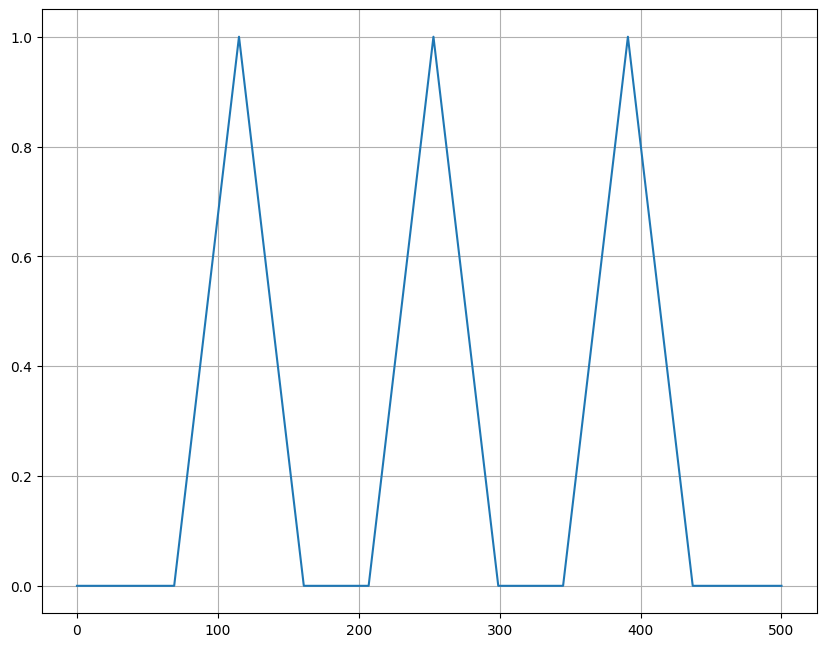

In [77]:
figure(figsize=(10, 8), dpi=100)
plt.plot(triangle_slice)
plt.grid(True)
plt.show()

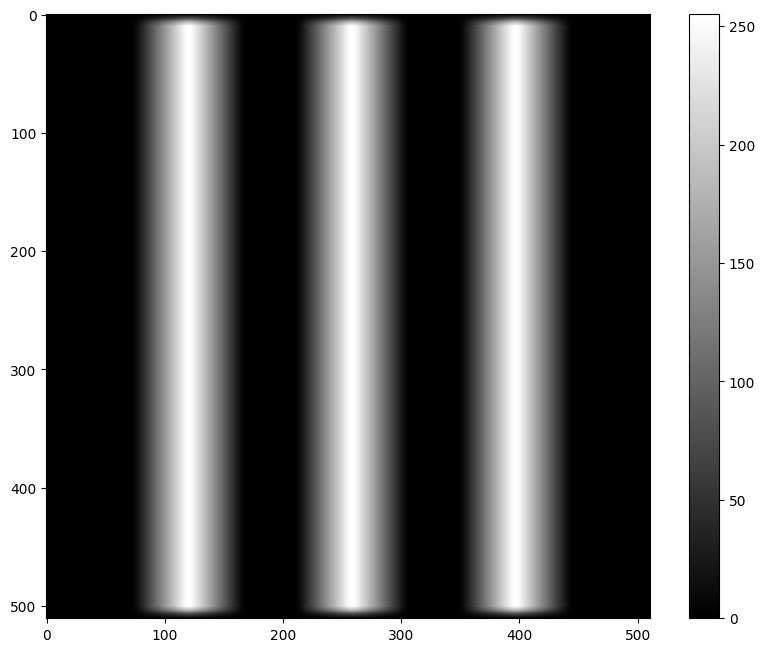

In [78]:
figure(figsize=(10, 8), dpi=100)
final_image = convolve2d(normalized_triangle_image, h_2d)
final_image = ((final_image - final_image.min()) * (1/(final_image.max() - final_image.min()) * 255)).astype('uint8')
plt.imshow(final_image, cmap='gray')
plt.colorbar()
plt.show()